## Imports, Reading Data, Setting up tests

In [55]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV


In [16]:
training_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/broadband_training_bin_1.csv')
test_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/broadband_test_bin_1.csv')


In [17]:
#These are taken from the PickingVariables notebook

all_broadband_variables = ["pct_internet", 
                           "pct_computer_with_broadband",
                           "pct_internet_broadband_any_type",
                           "pct_internet_none",
                           "pct_internet_cellular",
                           "pct_internet_no_subscrp",
                           "Ookla Median Download Speed (Mbps)",
                           "Ookla Median Upload Speed (Mbps)",
                           "All_Provider_Count_100",
                           "All_Provider_Count_25",
                           "pct_internet_broadband_satellite",
                           "Fixed_Wireless_Provider_Count_25",
                           "pct_internet_broadband_fiber",
                           "Wired_Provider_Count_100",
                           "Wired_Provider_Count_25",
                           "Fixed_Wireless_Provider_Count_100",
                           "Satellite_Provider_Count_100",
                           "Fixed_Wireless_Provider_Count",
                           "MaxAdUp",
                           "All_Provider_Count",
                           "Satellite_Provider_Count_25",
                           "pct_internet_other",
                           "pct_internet_dial_up",
                           "pct_internet_dial_up",
                           "Wired_Provider_Count",
                           "Satellite_Provider_Count"]

#All variables with correlation > 0.3
high_corr = ["pct_internet", 
             "pct_computer_with_broadband",
             "pct_internet_broadband_any_type",
             "pct_internet_none",
             "pct_internet_cellular",
             "pct_internet_no_subscrp"]

#All variables with correlation > 0.1
mid_corr = ["pct_internet", 
            "pct_computer_with_broadband",
            "pct_internet_broadband_any_type",
            "pct_internet_none",
            "pct_internet_cellular",
            "pct_internet_no_subscrp",
            "Ookla Median Download Speed (Mbps)",
            "Ookla Median Upload Speed (Mbps)",
            "All_Provider_Count_100",
            "All_Provider_Count_25"]

small_covariance_med_corr = ['pct_internet',
                             'Ookla Median Download Speed (Mbps)',
                             'All_Provider_Count_100',
                             'All_Provider_Count_25']

#All except income variables
all_vars = [ 'tract_geoid',
             'All_Provider_Count',
             'MaxAdDown',
             'MaxAdUp',
             'Wired_Provider_Count',
             'Satellite_Provider_Count',
             'Fixed_Wireless_Provider_Count',
             'All_Provider_Count_25',
             'All_Provider_Count_100',
             'Fixed_Wireless_Provider_Count_25',
             'Wired_Provider_Count_25',
             'Satellite_Provider_Count_25',
             'Fixed_Wireless_Provider_Count_100',
             'Wired_Provider_Count_100',
             'Satellite_Provider_Count_100',
             'median_age_overall',
             'median_age_male',
             'median_age_female',
             'state',
             'county',
             'tract',
             'employment_rate',
             'total_households',
             'ave_household_size',
             'ave_family_size',
             'pct_health_ins_children',
             'pct_health_ins_19_64',
             'pct_health_ins_65+',
             'total_population',
             'pct_white',
             'pct_hisp_latino',
             'pct_black',
             'pct_native',
             'pct_asian',
             'pct_hi_pi',
             'pct_other_race',
             'pct_two+_race',
             'pct_pop_bachelors+',
             'pct_pop_hs+',
             'pct_internet',
             'pct_internet_dial_up',
             'pct_internet_broadband_any_type',
             'pct_internet_cellular',
             'pct_only_cellular',
             'pct_internet_broadband_fiber',
             'pct_internet_broadband_satellite',
             'pct_internet_only_satellite',
             'pct_internet_other',
             'pct_internet_no_subscrp',
             'pct_internet_none',
             'pct_computer',
             'pct_computer_with_dialup',
             'pct_computer_with_broadband',
             'pct_computer_no_internet',
             'pct_no_computer',
             'ALAND',
             'AWATER',
             'ALAND_SQMI',
             'AWATER_SQMI',
             'population_density',
             'pct_pop_ged',
             'pct_pop_some_college',
             'pct_pop_associates',
             'pct_pop_lt_5',
             'pct_pop_5_to_9',
             'pct_pop_10_to_14',
             'pct_pop_15_to_19',
             'pct_pop_20_to_24',
             'pct_pop_25_to_29',
             'pct_pop_30_to_34',
             'pct_pop_35_to_39',
             'pct_pop_40_to_44',
             'pct_pop_45_to_49',
             'pct_pop_50_to_54',
             'pct_pop_55_to_59',
             'pct_pop_60_to_64',
             'pct_pop_65_to_69',
             'pct_pop_70_to_74',
             'pct_pop_75_to_79',
             'pct_pop_80_to_84',
             'pct_pop_gt_85',
             'pct_pop_disability',
             'pct_pop_households_with_kids',
             'pct_pop_foreign_born',
             'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
             'Ookla Median Download Speed (Mbps)',
             'Ookla Median Upload Speed (Mbps)',
             'Primary RUCA Code 2010',
             'Secondary RUCA Code, 2010 (see errata)',
             '0_5_providers',
             '6_10_providers',
             '11_15_providers',
             '16_20_providers',
             '20+_providers',
             '0_25_MaxAdDown',
             '25_99_MaxAdDown',
             '99_499_MaxAdDown',
             '499_inf_MaxAdDown',
             '0_25_Ookla Median Download Speed (Mbps)',
             '25_99_Ookla Median Download Speed (Mbps)',
             '99_499_Ookla Median Download Speed (Mbps)',
             '499_inf_Ookla Median Download Speed (Mbps)',
             '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             'single_provider',
             'Primary RUCA Code - 1.0',
             'Primary RUCA Code - 2.0',
             'Primary RUCA Code - 4.0',
             'Primary RUCA Code - 10.0',
             'Primary RUCA Code - 7.0',
             'Primary RUCA Code - 5.0',
             'Primary RUCA Code - 8.0',
             'Primary RUCA Code - 3.0',
             'Primary RUCA Code - 6.0',
             'Primary RUCA Code - 9.0',
             'Primary RUCA Code - 99.0',
             'Secondary RUCA Code - 1.0',
             'Secondary RUCA Code - 2.0',
             'Secondary RUCA Code - 4.0',
             'Secondary RUCA Code - 10.0',
             'Secondary RUCA Code - 7.0',
             'Secondary RUCA Code - 5.0',
             'Secondary RUCA Code - 1.1',
             'Secondary RUCA Code - 8.0',
             'Secondary RUCA Code - 3.0',
             'Secondary RUCA Code - 6.0',
             'Secondary RUCA Code - 9.0',
             'Secondary RUCA Code - 4.1',
             'Secondary RUCA Code - 99.0',
             'Secondary RUCA Code - 7.1',
             'Secondary RUCA Code - 10.2',
             'Secondary RUCA Code - 2.1',
             'Secondary RUCA Code - 10.1',
             'Secondary RUCA Code - 10.3',
             'Secondary RUCA Code - 7.2',
             'Secondary RUCA Code - 5.1',
             'Secondary RUCA Code - 8.1',
             'Secondary RUCA Code - 8.2']


## Modeling

### Functions

In [4]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [34]:
poverty_rate_train = np.array(training_data['poverty_rate'])
poverty_rate_test = np.array(test_data['poverty_rate'])

def poverty_rf_model(train_df, 
                     test_df, 
                     variable_list,
                     poverty_rate_train = poverty_rate_train,  
                     poverty_rate_test = poverty_rate_test):
    train_variables = np.array(train_df[variable_list])
    test_variables = np.array(test_df[variable_list])
    
    model = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(train_variables, poverty_rate_train)
    predicted = model.predict(test_variables)
    
    regression_results(poverty_rate_test, predicted)
    return pd.DataFrame(model.feature_importances_, index = variable_list).sort_values(by=0,ascending = False)




In [29]:
poverty_rf_model(training_data, test_data, all_broadband_variables)

explained_variance:  0.5084
r2:  0.5074
MAE:  5.6073
MSE:  59.0159
RMSE:  7.6822


,0
pct_internet,0.273484
pct_computer_with_broadband,0.224249
pct_internet_broadband_any_type,0.025816
pct_internet_none,0.042694
pct_internet_cellular,0.041346
pct_internet_no_subscrp,0.042707
Ookla Median Download Speed (Mbps),0.056388
Ookla Median Upload Speed (Mbps),0.045802
All_Provider_Count_100,0.008988
All_Provider_Count_25,0.008809


In [35]:
poverty_rf_model(training_data, test_data, high_corr)

explained_variance:  0.4393
r2:  0.4385
MAE:  5.9996
MSE:  67.264
RMSE:  8.2015


,0
pct_internet,0.334877
pct_computer_with_broadband,0.286225
pct_internet_cellular,0.119297
pct_internet_broadband_any_type,0.089357
pct_internet_none,0.086131
pct_internet_no_subscrp,0.084113


In [27]:
poverty_rf_model(training_data, test_data, mid_corr)

explained_variance:  0.485
r2:  0.4842
MAE:  5.7395
MSE:  61.7986
RMSE:  7.8612


,0
pct_internet,0.300634
pct_computer_with_broadband,0.246791
pct_internet_broadband_any_type,0.050914
pct_internet_none,0.060704
pct_internet_cellular,0.077958
pct_internet_no_subscrp,0.057802
Ookla Median Download Speed (Mbps),0.094222
Ookla Median Upload Speed (Mbps),0.071547
All_Provider_Count_100,0.018765
All_Provider_Count_25,0.020662


In [26]:
poverty_rf_model(training_data, test_data, small_covariance_med_corr)

explained_variance:  0.3961
r2:  0.3954
MAE:  6.1685
MSE:  72.433
RMSE:  8.5108


,0
pct_internet,0.662285
Ookla Median Download Speed (Mbps),0.255690
All_Provider_Count_100,0.040088
All_Provider_Count_25,0.041937


In [38]:
feature_importance_all_vars = poverty_rf_model(training_data, 
                                               test_data, 
                                               all_vars)


explained_variance:  0.776
r2:  0.7759
MAE:  3.7825
MSE:  26.8444
RMSE:  5.1812


From the all_vars model, we can pick the top variables to use in the grid search. There's a pretty steep dropoff after the 8th variable, so let's just use those.

<AxesSubplot:>

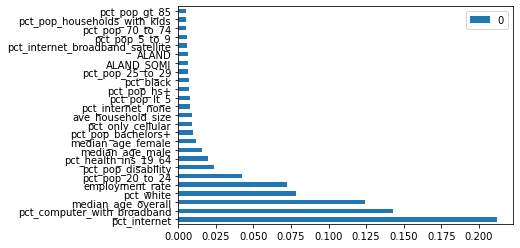

In [43]:
feature_importance_all_vars.head(25).plot.barh()

In [48]:
feature_importance_all_vars.head(7).index.values

array(['pct_internet', 'pct_computer_with_broadband',
       'median_age_overall', 'pct_white', 'employment_rate',
       'pct_pop_20_to_24', 'pct_pop_disability'], dtype=object)

In [49]:
key_vars = ['pct_internet', 
            'pct_computer_with_broadband',
            'median_age_overall', 
            'pct_white', 
            'employment_rate',
            'pct_pop_20_to_24', 
            'pct_pop_disability']

---

## Use Grid Search to find best hyperparameters

In [51]:
# Number of trees in random forest
n_estimators = [100, 200, 500, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 500, 1000]}


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and us

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 20, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(training_data[key_vars], poverty_rate_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  52.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  53.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  56.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 2.7min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 3.8min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time= 3.4min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=42, verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [60]:
predictions = rf_random.predict(test_data[key_vars])

In [62]:
regression_results(poverty_rate_test, predictions)

explained_variance:  0.7276
r2:  0.7276
MAE:  4.1451
MSE:  32.6335
RMSE:  5.7126


Optimizing has created a much better model! 